In [1]:
# ამ კოდით ხდება pandas და matplotlib ბიბლიოთეკების დაიმპორტება,
# padnas-ს მონაცემთა მანიპულირებისთვის და matplotlib-ს სქემების შესაქმნელად.

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# შევქმენი data frame, იმისათვის რომ წამეკითხა csv ფაილი

df = pd.read_csv('survey_results_public.csv')

In [4]:
# ამ კოდს ამოაქვს პირველი 25 მონაცემი მწკრივი 'Age' და 'Employment' ის მიხედვით, შექმნილი data frame-დან

subset = df.loc[:25, ['Age', 'Employment']]
print(subset)

                   Age                                         Employment
0      18-24 years old                                                NaN
1      25-34 years old                                Employed, full-time
2      45-54 years old                                Employed, full-time
3      25-34 years old                                Employed, full-time
4      25-34 years old  Employed, full-time;Independent contractor, fr...
5      35-44 years old                                Employed, full-time
6      35-44 years old                                Employed, full-time
7      25-34 years old                                Employed, full-time
8      45-54 years old                                Employed, full-time
9      25-34 years old                 Not employed, but looking for work
10     25-34 years old                                Employed, full-time
11     25-34 years old                                Employed, full-time
12     25-34 years old                

In [5]:
# ეს კოდი წესით data frame-ის ინდექსირებას უნდა აკეთებდეს, რო მერე სწრაფად მოვძებნო ResponseId-ის მიხედვით მონაცემები, მაგრამ ჩემთან არ მუშაობს რატომღაც :))

df = df.set_index('ResponseId')

In [6]:
# აქ ფილტრი გამოვიყენე, data frame-ის გასაფილტრად, რომ ეჩვენებინა მონაცემები გაწერილი პარამეტრების მიხედვით. 
# შედეგად გამოდის გაფილტრული data frame მოცემული პარამეტრების მიხედვით და როგორც ცანს ResponseId არის ინდექსი :)))

filtered_df = df[(df['Age'] == '25-34 years old') & (df['Employment'] == 'Employed, full-time')]
print(filtered_df)

               Q120                                         MainBranch  \
ResponseId                                                               
2           I agree                     I am a developer by profession   
4           I agree                     I am a developer by profession   
8           I agree                     I am a developer by profession   
11          I agree                     I am a developer by profession   
12          I agree                     I am a developer by profession   
...             ...                                                ...   
89164       I agree  I am not primarily a developer, but I write co...   
89166       I agree                     I am a developer by profession   
89171       I agree                     I am a developer by profession   
89172       I agree                     I am a developer by profession   
89176       I agree                     I am a developer by profession   

                        Age          

In [17]:
# ეს კოდი ახარისხებს data frame-ს პარამეტრების მიხედვით: 'Age' ზრდადობით, 'Employment' კლებადობით, გამოვიყენე მნიშვნელობების დაყოფის ფუნქცია

sorted_df = df.sort_values(by=['Age', 'Employment'], ascending=[True, False])
print(sorted_df)

               Q120                                         MainBranch  \
ResponseId                                                               
3150        I agree                              I am learning to code   
4146        I agree                              I am learning to code   
4185        I agree                              I am learning to code   
9552        I agree  I am not primarily a developer, but I write co...   
20276       I agree                        I code primarily as a hobby   
...             ...                                                ...   
88133       I agree                                      None of these   
88239       I agree                                      None of these   
88610       I agree                                      None of these   
88632       I agree                                      None of these   
88941       I agree                              I am learning to code   

                           Age  \
Res

In [19]:
# ეს კოდი ითვლის სხვადასხვა სტატისტიკას: საშუალოს, სტანდარტული გადახრას, მედიანას, მინიმალურ და მაქსიმალურ მნიშვნელობებს 'CompTotal' სვეტისთვის


mean = df['CompTotal'].mean()
std = df['CompTotal'].std()
median = df['CompTotal'].median()
min_value = df['CompTotal'].min()
max_value = df['CompTotal'].max()

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")
print(f"Median: {median}")
print(f"Min: {min_value}")
print(f"Max: {max_value}")


Mean: 1.0368066355624674e+42
Standard Deviation: 2.276847201243934e+44
Median: 115000.0
Min: 0.0
Max: 4.999999999999999e+46


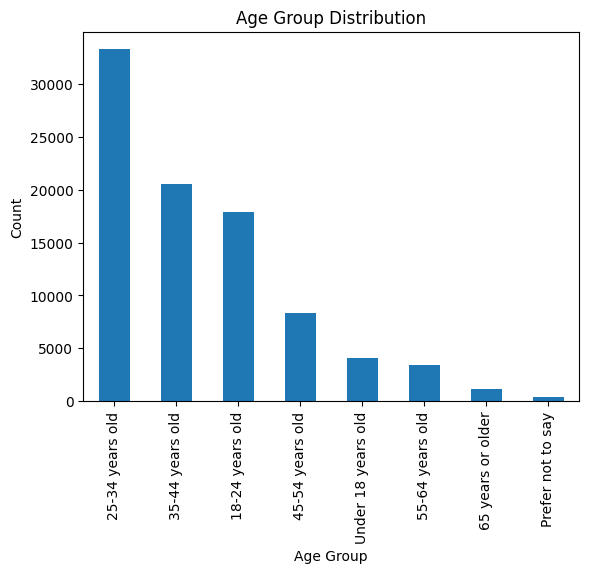

In [20]:
# ეს კოდი ქმნის დიაგრამას data frame-ში ასაკობრივი ჯგუფების განაწილების ვიზუალიზაციისთვის. 
# ის იყენებს სვეტს „ასაკი“ თითოეული ასაკობრივი ჯგუფის შემთხვევის დასათვლელად და შემდეგ ასახავს რაოდენობის დათვლას, როგორც სვეტოვანი დიაგრამა. 
# სათაური და სქემა ნაჩვენებია plt.show() გამოყენებით.


df['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

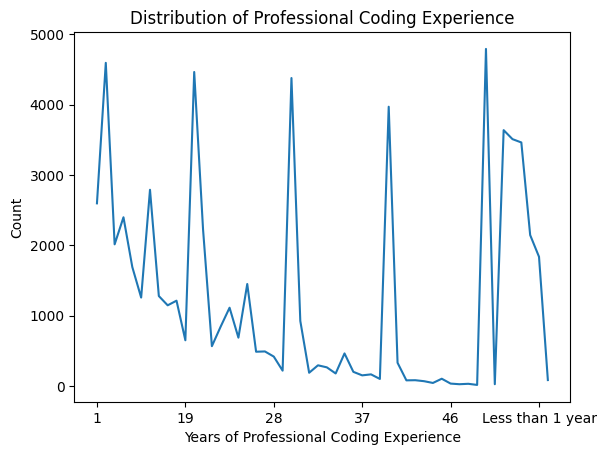

In [21]:
# ეს კოდი ქმნის ხაზოვან დიაგრამას Distribution of Professional Coding Experience ვიზუალიზაციისთვის .
# ეს კოდი იყენებს „YearsCodePro“ სვეტს, ითვლის მოვლენებს, ახარისხებს მონაცემებს ინდექსის მიხედვით (Years of Professional Coding Experience) და გამოსახავს მას ხაზოვანი დიაგრამის სახით. 



df['YearsCodePro'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Count')
plt.title('Distribution of Professional Coding Experience')
plt.show()